In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.mirror.cdnetworks.com/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!tar xf spark-3.0.0-bin-hadoop3.2.tgz
!pip install -q findspark


import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     |████████████████████████████████| 204.7MB 63kB/s 
     |████████████████████████████████| 204kB 44.3MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.0-py2.py3-none-any.whl size=205044182 sha256=4502ca30b2ba0726674ee091cc3adf6c6f0e95f6ee5f457b3978e8e90ecf1ed0
  Stored in directory: /root/.cache/pip/wheels/57/27/4d/ddacf7143f8d5b76c45c61ee2e43d9f8492fc5a8e78ebd7d37
Successfully built pyspark
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 35.8 MB of archives.
After this 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [ ]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [ ]:
spark

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2020-07-31 06:40:09--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.230.235.205, 34.205.198.58, 34.235.94.90, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.230.235.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  72.6MB/s    in 0.2s    

2020-07-31 06:40:10 (72.6 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
https://dea4c21d8845.ngrok.io


In [ ]:
df = spark.read.csv('cruise_ship_info.csv',inferSchema=True,header=True)


In [ ]:
df.show()


+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|
|    Ecstasy|   Carnival| 22|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Elation|   Carnival| 15|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Fantasy|   Carnival| 23| 

In [ ]:
df.describe().show()


+-------+---------+-----------+------------------+------------------+-----------------+-----------------+------------------+-----------------+-----------------+
|summary|Ship_name|Cruise_line|               Age|           Tonnage|       passengers|           length|            cabins|passenger_density|             crew|
+-------+---------+-----------+------------------+------------------+-----------------+-----------------+------------------+-----------------+-----------------+
|  count|      158|        158|               158|               158|              158|              158|               158|              158|              158|
|   mean| Infinity|       null|15.689873417721518| 71.28467088607599|18.45740506329114|8.130632911392404| 8.830000000000005|39.90094936708861|7.794177215189873|
| stddev|      NaN|       null| 7.615691058751413|37.229540025907866|9.677094775143416|1.793473548054825|4.4714172221480615| 8.63921711391542|3.503486564627034|
|    min|Adventure|    Azamara|   

In [ ]:
df.describe().toPandas().transpose()


,0,1,2,3,4
summary,count,mean,stddev,min,max
Ship_name,158,Infinity,NaN,Adventure,Zuiderdam
Cruise_line,158,None,None,Azamara,Windstar
Age,158,15.689873417721518,7.615691058751413,4,48
Tonnage,158,71.28467088607599,37.229540025907866,2.329,220.0
passengers,158,18.45740506329114,9.677094775143416,0.66,54.0
length,158,8.130632911392404,1.793473548054825,2.79,11.82
cabins,158,8.830000000000005,4.4714172221480615,0.33,27.0
passenger_density,158,39.90094936708861,8.63921711391542,17.7,71.43
crew,158,7.794177215189873,3.503486564627034,0.59,21.0


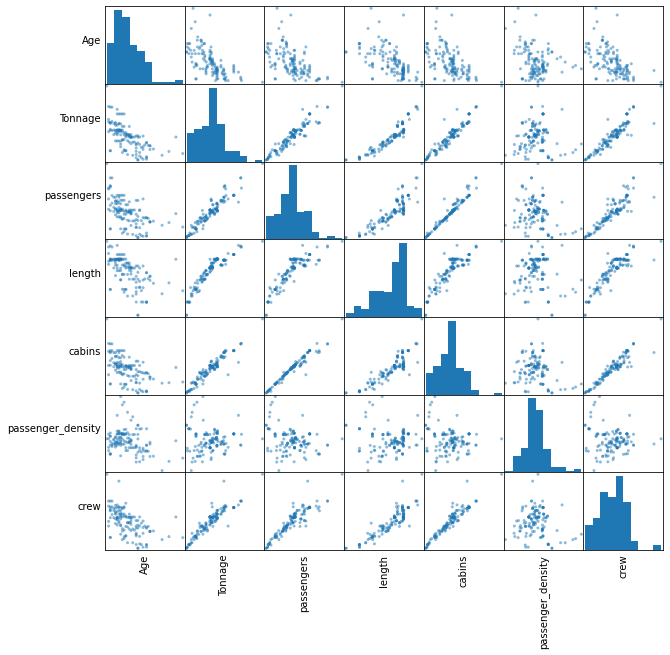

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = df.select(numeric_features).sample(False, 0.8).toPandas()
axs = scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [ ]:
df.groupBy('Cruise_line').count().show()


+-----------------+-----+
|      Cruise_line|count|
+-----------------+-----+
|            Costa|   11|
|              P&O|    6|
|           Cunard|    3|
|Regent_Seven_Seas|    5|
|              MSC|    8|
|         Carnival|   22|
|          Crystal|    2|
|           Orient|    1|
|         Princess|   17|
|        Silversea|    4|
|         Seabourn|    3|
| Holland_American|   14|
|         Windstar|    3|
|           Disney|    2|
|        Norwegian|   13|
|          Oceania|    3|
|          Azamara|    2|
|        Celebrity|   10|
|             Star|    6|
|  Royal_Caribbean|   23|
+-----------------+-----+



In [ ]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="Cruise_line", outputCol="cruise_cat")
indexed = indexer.fit(df).transform(df)
indexed.head(5)

[Row(Ship_name='Journey', Cruise_line='Azamara', Age=6, Tonnage=30.276999999999997, passengers=6.94, length=5.94, cabins=3.55, passenger_density=42.64, crew=3.55, cruise_cat=16.0),
 Row(Ship_name='Quest', Cruise_line='Azamara', Age=6, Tonnage=30.276999999999997, passengers=6.94, length=5.94, cabins=3.55, passenger_density=42.64, crew=3.55, cruise_cat=16.0),
 Row(Ship_name='Celebration', Cruise_line='Carnival', Age=26, Tonnage=47.262, passengers=14.86, length=7.22, cabins=7.43, passenger_density=31.8, crew=6.7, cruise_cat=1.0),
 Row(Ship_name='Conquest', Cruise_line='Carnival', Age=11, Tonnage=110.0, passengers=29.74, length=9.53, cabins=14.88, passenger_density=36.99, crew=19.1, cruise_cat=1.0),
 Row(Ship_name='Destiny', Cruise_line='Carnival', Age=17, Tonnage=101.353, passengers=26.42, length=8.92, cabins=13.21, passenger_density=38.36, crew=10.0, cruise_cat=1.0)]

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [ ]:
indexed.columns


['Ship_name',
 'Cruise_line',
 'Age',
 'Tonnage',
 'passengers',
 'length',
 'cabins',
 'passenger_density',
 'crew',
 'cruise_cat']

In [ ]:
assembler = VectorAssembler(
  inputCols=['Age',
             'Tonnage',
             'passengers',
             'length',
             'cabins',
             'passenger_density',
             'cruise_cat'],
    outputCol="features")

In [ ]:
output = assembler.transform(indexed)

In [ ]:
output.select("features", "crew").show()


+--------------------+----+
|            features|crew|
+--------------------+----+
|[6.0,30.276999999...|3.55|
|[6.0,30.276999999...|3.55|
|[26.0,47.262,14.8...| 6.7|
|[11.0,110.0,29.74...|19.1|
|[17.0,101.353,26....|10.0|
|[22.0,70.367,20.5...| 9.2|
|[15.0,70.367,20.5...| 9.2|
|[23.0,70.367,20.5...| 9.2|
|[19.0,70.367,20.5...| 9.2|
|[6.0,110.23899999...|11.5|
|[10.0,110.0,29.74...|11.6|
|[28.0,46.052,14.5...| 6.6|
|[18.0,70.367,20.5...| 9.2|
|[17.0,70.367,20.5...| 9.2|
|[11.0,86.0,21.24,...| 9.3|
|[8.0,110.0,29.74,...|11.6|
|[9.0,88.5,21.24,9...|10.3|
|[15.0,70.367,20.5...| 9.2|
|[12.0,88.5,21.24,...| 9.3|
|[20.0,70.367,20.5...| 9.2|
+--------------------+----+
only showing top 20 rows



In [ ]:
final_data = output.select("features", "crew")


In [ ]:
train_data,test_data = final_data.randomSplit([0.7,0.3])


In [ ]:
from pyspark.ml.regression import LinearRegression
# Create a Linear Regression Model object
lr = LinearRegression(labelCol='crew')

In [ ]:
# Fit the model to the data and call this model lrModel
lrModel = lr.fit(train_data,{lr.regParam:0.0})


In [ ]:
# Print the coefficients and intercept for linear regression
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [-0.02188817290758551,0.007151887726591385,-0.12135592021820987,0.4124387641094161,0.8107659246636222,-0.006455706426858375,0.05216869100464662] Intercept: -0.6637837908564803


In [ ]:
test_results = lrModel.evaluate(test_data)


In [ ]:
predictions1 = lrModel.transform(test_data)


In [ ]:
print("RMSE: {}".format(test_results.rootMeanSquaredError))
print("MSE: {}".format(test_results.meanSquaredError))
print("R2: {}".format(test_results.r2))

RMSE: 0.9729525133777067
MSE: 0.9466365932879967
R2: 0.9305454461025161


In [ ]:
test_results.residuals.show()

+--------------------+
|           residuals|
+--------------------+
|  0.2284401965591627|
| -1.3276250611759082|
| -0.9167478154805329|
|  0.4824752385383775|
| 0.15862978230690672|
| -1.2983615492740501|
| -0.5304474652220907|
|  1.0839190527114244|
|  1.0839190527114244|
|-0.35708573727742454|
| -0.3947050549040316|
| -0.5637457873834713|
|  -1.019655562832499|
| 0.01348091012445174|
|  0.8226449301023724|
| -0.9758792170173276|
|-0.00336247027000...|
| -0.4794791843416517|
|  0.8445331030099563|
|  0.3912709449943286|
+--------------------+
only showing top 20 rows



In [ ]:
predictions1.show()

+--------------------+-----+------------------+
|            features| crew|        prediction|
+--------------------+-----+------------------+
|[4.0,220.0,54.0,1...| 21.0|20.771559803440837|
|[5.0,86.0,21.04,9...|  8.0| 9.327625061175908|
|[6.0,30.276999999...| 3.55| 4.466747815480533|
|[6.0,93.0,23.94,9...|11.09|10.607524761461622|
|[6.0,110.23899999...| 11.5|11.341370217693093|
|[7.0,89.6,25.5,9....| 9.87| 11.16836154927405|
|[8.0,110.0,29.74,...| 11.6| 12.13044746522209|
|[9.0,113.0,26.74,...|12.38|11.296080947288576|
|[9.0,113.0,26.74,...|12.38|11.296080947288576|
|[10.0,81.76899999...| 8.42| 8.777085737277424|
|[10.0,90.09,25.01...| 8.58| 8.974705054904032|
|[10.0,105.0,27.2,...|10.68|11.243745787383471|
|[10.0,138.0,31.14...|11.85|12.869655562832499|
|[12.0,50.0,7.0,7....| 4.45| 4.436519089875548|
|[12.0,91.0,20.32,...| 9.99| 9.167355069897628|
|[12.0,138.0,31.14...|11.85|12.825879217017327|
|[13.0,25.0,3.82,5...| 2.95|2.9533624702700045|
|[13.0,61.0,13.8,7...|  6.0| 6.479479184

In [ ]:
from pyspark.sql.functions import corr

In [ ]:
df.select(corr('crew','passengers')).show()

+----------------------+
|corr(crew, passengers)|
+----------------------+
|    0.9152341306065384|
+----------------------+



In [ ]:
df.select(corr('crew','cabins')).show()

+------------------+
|corr(crew, cabins)|
+------------------+
|0.9508226063578497|
+------------------+



**پروژه دوم**

In [ ]:
data = spark.read.csv('customer_churn.csv',inferSchema=True,
                     header=True)

In [ ]:
data.printSchema()


root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Churn: integer (nullable = true)



In [ ]:
data.describe().show()


+-------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+--------------------+--------------------+-------------------+
|summary|        Names|              Age|   Total_Purchase|   Account_Manager|            Years|         Num_Sites|       Onboard_date|            Location|             Company|              Churn|
+-------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+--------------------+--------------------+-------------------+
|  count|          900|              900|              900|               900|              900|               900|                900|                 900|                 900|                900|
|   mean|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|               null|                null|                null|0.16666666666666666|
| stddev| 

In [ ]:
data.columns


['Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Onboard_date',
 'Location',
 'Company',
 'Churn']

In [ ]:
from pyspark.ml.feature import VectorAssembler


In [ ]:
assembler = VectorAssembler(inputCols=['Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites'],outputCol='features')

In [ ]:
output = assembler.transform(data)


In [ ]:
final_data = output.select('features','churn')


In [ ]:
train_churn,test_churn = final_data.randomSplit([0.7,0.3])


In [ ]:
from pyspark.ml.classification import LogisticRegression
lr_churn = LogisticRegression(labelCol='churn')
fitted_churn_model = lr_churn.fit(train_churn)
training_sum = fitted_churn_model.summary


In [ ]:
training_sum.predictions.describe().show()


+-------+-------------------+-------------------+
|summary|              churn|         prediction|
+-------+-------------------+-------------------+
|  count|                628|                628|
|   mean|0.16560509554140126|0.12101910828025478|
| stddev|0.37202208365041367|0.32640946430866896|
|    min|                0.0|                0.0|
|    max|                1.0|                1.0|
+-------+-------------------+-------------------+



In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
pred_and_labels = fitted_churn_model.evaluate(test_churn)


In [ ]:
pred_and_labels.predictions.show()


+--------------------+-----+--------------------+--------------------+----------+
|            features|churn|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[25.0,9672.03,0.0...|    0|[5.04607417703679...|[0.99360659384839...|       0.0|
|[26.0,8787.39,1.0...|    1|[0.80767835565363...|[0.69161455543475...|       0.0|
|[27.0,8628.8,1.0,...|    0|[5.64109177804747...|[0.99646355921935...|       0.0|
|[28.0,8670.98,0.0...|    0|[8.14003842563161...|[0.99970845902881...|       0.0|
|[28.0,11204.23,0....|    0|[2.10326836599626...|[0.89122044105125...|       0.0|
|[29.0,8688.17,1.0...|    1|[2.84771585423618...|[0.94520049221807...|       0.0|
|[29.0,9617.59,0.0...|    0|[4.74790582430184...|[0.99140468756038...|       0.0|
|[29.0,10203.18,1....|    0|[3.88330649303143...|[0.97983244570071...|       0.0|
|[29.0,12711.15,0....|    0|[5.60133749365893...|[0.99632066633584...|       0.0|
|[30.0,7960.64,1

In [ ]:
churn_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                           labelCol='churn')

In [ ]:
auc = churn_eval.evaluate(pred_and_labels.predictions)
auc

0.7560600230858022

In [ ]:
final_lr_model = lr_churn.fit(final_data)


In [ ]:
new_customers = spark.read.csv('new_customers.csv',inferSchema=True,
                              header=True)

In [ ]:
new_customers.printSchema()


root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)



In [ ]:
test_new_customers = assembler.transform(new_customers)


In [ ]:
test_new_customers.printSchema()


root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- features: vector (nullable = true)



In [ ]:
final_results = final_lr_model.transform(test_new_customers)


In [ ]:
final_results.select('Company','prediction').show()


+----------------+----------+
|         Company|prediction|
+----------------+----------+
|        King Ltd|       0.0|
|   Cannon-Benson|       1.0|
|Barron-Robertson|       1.0|
|   Sexton-Golden|       1.0|
|        Wood LLC|       0.0|
|   Parks-Robbins|       1.0|
+----------------+----------+

